In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-28 11:50:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  48.4MB/s    in 2.2s    

2021-10-28 11:51:02 (48.4 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
import os

num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Class names from subdirectorys
class_names = class_names[1:] # remove ".DS_Store"
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  
  return img

['1033251.jpg']
Image shape: (512, 512, 3)


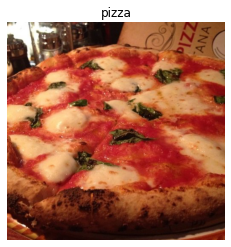

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

>**Support Functions**

In [ ]:
def plot_loss_curve(History): 
  train_loss= History.history["loss"]
  train_accuracy= History.history["accuracy"]

  val_loss= History.history["val_loss"]
  val_accuracy= History.history["val_accuracy"]

  epochs = range(len(History.history["loss"]))

  plt.figure(figsize=(7,7))
  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.legend()

  plt.figure(figsize=(7,7))
  plt.plot(epochs, train_accuracy, label="train_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.legend()

>**CNN Model 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Model
cnn_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

cnn_model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
cnn_hist_1 = cnn_model_1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 44s 253ms/step - loss: 0.5301 - accuracy: 0.7260 - val_loss: 0.4425 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4169 - accuracy: 0.8000 - val_loss: 0.3281 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3867 - accuracy: 0.8360 - val_loss: 0.3110 - val_accuracy: 0.8900
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3395 - accuracy: 0.8560 - val_loss: 0.2989 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3190 - accuracy: 0.8680 - val_loss: 0.2866 - val_accuracy: 0.8800


In [ ]:
cnn_model_1.evaluate(valid_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.2866 - accuracy: 0.8800


[0.2866087257862091, 0.8799999952316284]

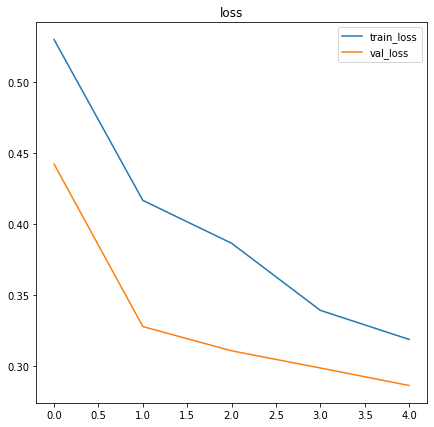

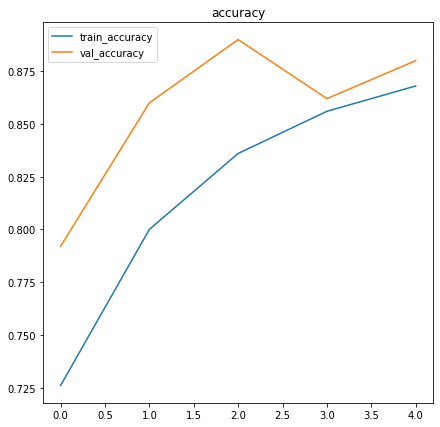

In [ ]:
plot_loss_curve(cnn_hist_1)

>**Non-CNN Model 1**

In [ ]:
tf.random.set_seed(42)

non_cnn_model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
non_cnn_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [ ]:
non_cnn_hist_1 = non_cnn_model_1.fit(train_data,
                                     epochs=5,
                                     steps_per_epoch=len(train_data),
                                     validation_data=valid_data,
                                     validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 4.6871 - accuracy: 0.6440 - val_loss: 0.8110 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.8951 - accuracy: 0.7027 - val_loss: 0.9830 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6040 - accuracy: 0.7580 - val_loss: 0.6837 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5820 - accuracy: 0.7593 - val_loss: 0.5243 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4509 - accuracy: 0.8053 - val_loss: 0.5766 - val_accuracy: 0.7380


In [ ]:
non_cnn_model_1.evaluate(valid_data)

16/16 [==============================] - 2s 151ms/step - loss: 0.5766 - accuracy: 0.7380


[0.5765801668167114, 0.7379999756813049]

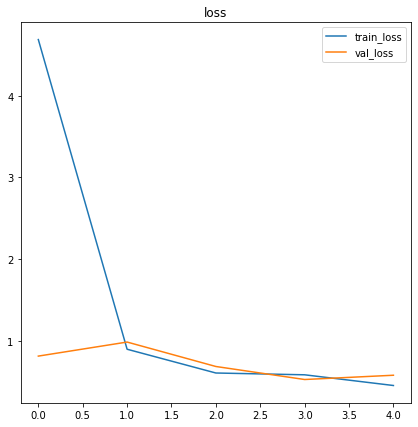

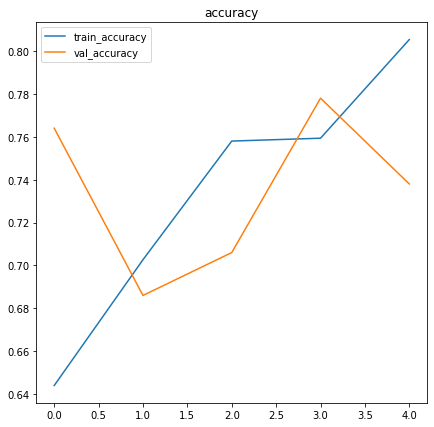

In [ ]:
plot_loss_curve(non_cnn_hist_1)

>**Model 1** with Data augmentation to reduce *Overfitting*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# augmented
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size= IMG_SIZE,
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=False)
# non_augmented
train_data_non_aug = train_datagen.flow_from_directory(train_dir,
                                                       target_size= IMG_SIZE,
                                                       batch_size=32,
                                                       class_mode="binary",
                                                       shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
img, label = train_data_non_aug.next()
aug_img, _ = train_data_aug.next()

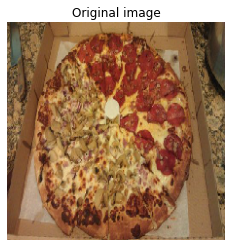

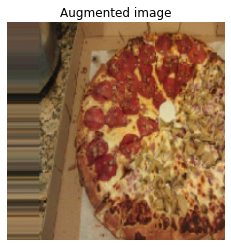

In [ ]:
import random
random_number = random.randint(0, 32) # batch_size is 32
plt.imshow(img[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_img[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

#Model
model_aug_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_aug_1.compile(loss=BinaryCrossentropy(),
                    optimizer=Adam(),
                    metrics="accuracy")

In [ ]:
aug_cnn_hist_1 = model_aug_1.fit(train_data_aug,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_aug),
                                 validation_data=test_data,
                                 validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 64s 1s/step - loss: 0.6508 - accuracy: 0.6040 - val_loss: 0.5657 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.5683 - accuracy: 0.7040 - val_loss: 0.3858 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 63s 1s/step - loss: 0.4930 - accuracy: 0.7720 - val_loss: 0.3547 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.4822 - accuracy: 0.7740 - val_loss: 0.3719 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.4559 - accuracy: 0.7900 - val_loss: 0.3482 - val_accuracy: 0.8400


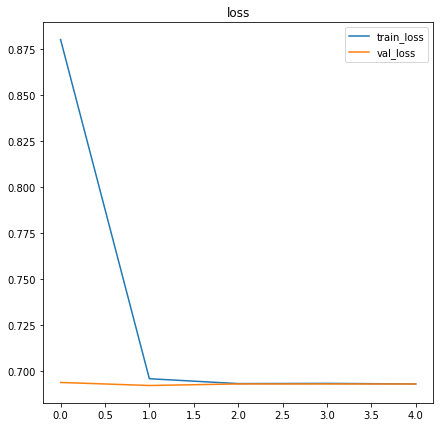

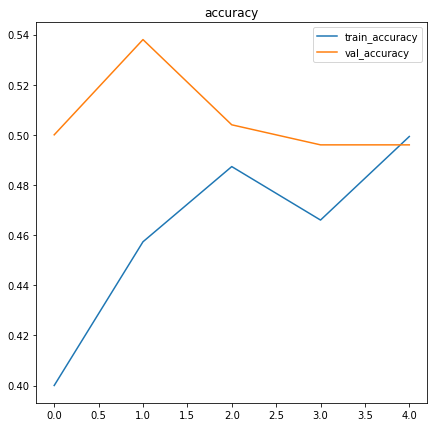

In [ ]:
plot_loss_curve(aug_cnn_hist_1)

>**Model 2** with Data augmentation to reduce *Overfitting*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data_aug_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size= IMG_SIZE,
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

model_aug_2 = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_aug_2.compile(loss="binary_crossentropy",
                    optimizer=Adam(),
                    metrics=["accuracy"])

In [ ]:
aug_cnn_hist_2 = model_aug_2.fit(train_data_aug_shuffled,
                                 epochs=10,
                                 steps_per_epoch=len(train_data_aug_shuffled),
                                 validation_data=test_data,
                                 validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 28s 567ms/step - loss: 0.9904 - accuracy: 0.5440 - val_loss: 0.5425 - val_accuracy: 0.7940
Epoch 2/10
47/47 [==============================] - 26s 555ms/step - loss: 0.5961 - accuracy: 0.6980 - val_loss: 0.4664 - val_accuracy: 0.8180
Epoch 3/10
47/47 [==============================] - 26s 560ms/step - loss: 0.5930 - accuracy: 0.7140 - val_loss: 0.5786 - val_accuracy: 0.7040
Epoch 4/10
47/47 [==============================] - 26s 563ms/step - loss: 0.5589 - accuracy: 0.7207 - val_loss: 0.3915 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 26s 562ms/step - loss: 0.5251 - accuracy: 0.7500 - val_loss: 0.3579 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 26s 563ms/step - loss: 0.4981 - accuracy: 0.7647 - val_loss: 0.3452 - val_accuracy: 0.8440
Epoch 7/10
47/47 [==============================] - 27s 564ms/step - loss: 0.5140 - accuracy: 0.7533 - val_loss: 0.3675 - val_accuracy: 0.8480

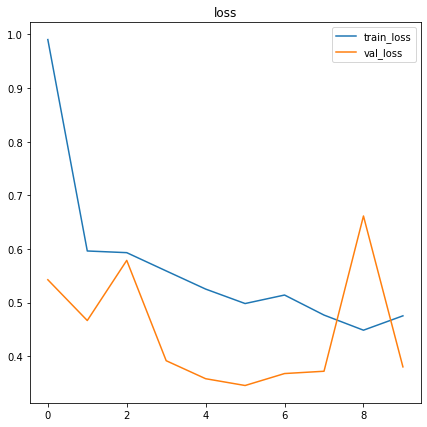

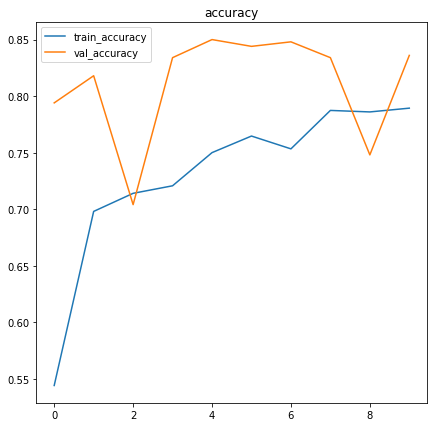

In [ ]:
plot_loss_curve(aug_cnn_hist_2)

In [ ]:
 import numpy as np
 from google.colab import files
 from keras.preprocessing import image

# def load_and_prep_image(filename, img_shape=224):

#   img = tf.io.read_file(filename)
#   img = tf.image.decode_image(img)
#   img = tf.image.resize(img, size=[img_shape, image_shape])
#   img = img/255.
#   return img;

def pred_and_plot(model, class_names=class_names):
  # uploaded = files.upload()
  for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = x/225.
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    # img = load_and_prep_image(filename)
    # pred = model.predict(tf.expand_dims(img, axis=0))
    # pred_class = class_name[int(tf.round(pred))]

    pred = model.predict(images, batch_size=32) 
    pred_class = class_names[int(tf.round(pred))]

    # plt.imshow(img)
    # plt.title(f"Prediction: {pred_class}")
    # plt.axis(False)
    print(fn + " is a " + pred_class)


In [ ]:
uploaded = files.upload()

Saving steak1.jpg to steak1.jpg
Saving pizza1.jpg to pizza1.jpg
Saving steak0.jpg to steak0.jpg
Saving Mushroom-Pizza-with-Herbs-011.jpg to Mushroom-Pizza-with-Herbs-011.jpg
Saving pizza-e1569475959190-1280x720.jpg to pizza-e1569475959190-1280x720.jpg
Saving steak3.jpg to steak3.jpg
Saving domino-s-pizza.jpg to domino-s-pizza.jpg


In [ ]:
pred_and_plot(model_aug_2)

steak1.jpg is a steak
pizza1.jpg is a steak
steak0.jpg is a steak
Mushroom-Pizza-with-Herbs-011.jpg is a steak
pizza-e1569475959190-1280x720.jpg is a pizza
steak3.jpg is a steak
domino-s-pizza.jpg is a pizza
